In [11]:
import numpy as np
import time
import os
import pandas as pd
import pickle
import netCDF4
from netCDF4 import Dataset
import datetime
import sys


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

sys.path.insert(0, '/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/src')
# Load utilitys
from utilis.Logger import Logger
from utilis.Timing import Timing
from utilis.utility_funcs import *
from utilis.Grid import Grid
from utilis.WGS import WGS
from Covariance import Covariance


# Load other
from Sinmod import Sinmod
from Boundary import Boundary
from plotting.CascadePlotting import CascadePlotting

In [12]:
# Load the netCDF4 file 
file_path = "/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/figures/tests/Cascade/predictions.nc"
filename = "predictions.nc"
# Open the netCDF4 file
nc_file = Dataset(file_path, 'r')

nc_file


<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Predictions from the CASCADE model
    history: Created 2025-04-29 15:25:22.730830
    source: CASCADE model
    author: André Olaisen
    institution: NTNU IMF
    contact: andre.j.h.olaisen@ntnu.no
    version: 1.0
    date: 2025-04-29 15:25:22
    title: Predictions from the CASCADE model
    dimensions(sizes): time(4), xc(281), yc(125)
    variables(dimensions): float64 time(time), float64 x(xc), float64 y(yc), float64 biomass_estimate(time, yc, xc), float64 biomass_estimate_top_10m(time, yc, xc), float64 uncertainty_biomass(time, yc, xc), float64 information_gain(time, yc, xc)
    groups: 

In [17]:
time_ax = nc_file.variables['time'][:]
xc = nc_file.variables['x'][:]
yc = nc_file.variables['y'][:]

len(xc) * len(yc)


35125

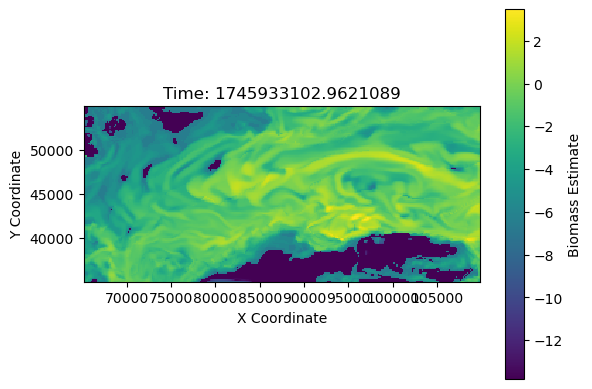

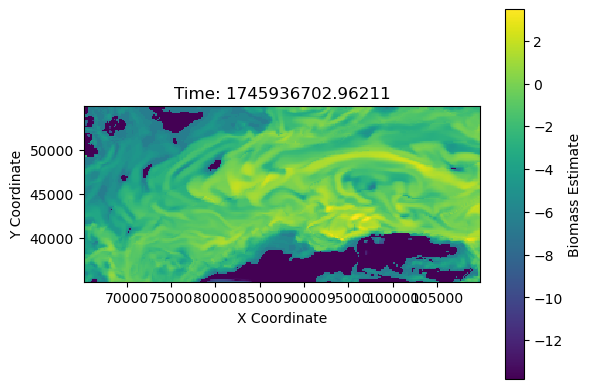

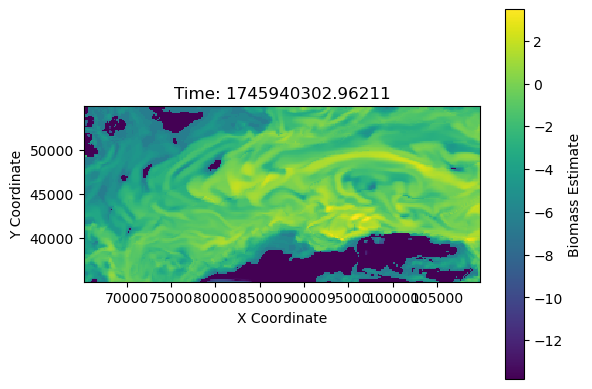

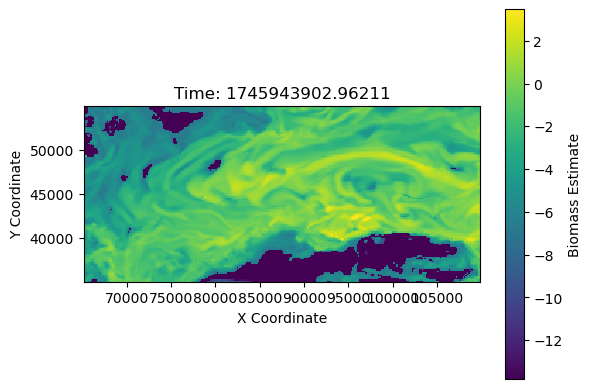

In [14]:
for t in range(len(time_ax)):
    biomass_estimate_t = nc_file.variables['biomass_estimate'][t, :, :]
    plt.imshow(biomass_estimate_t, cmap='viridis', interpolation='nearest', origin='lower', extent=(xc.min(), xc.max(), yc.min(), yc.max()))    
    plt.colorbar(label='Biomass Estimate')
    plt.title(f'Time: {time_ax[t]}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


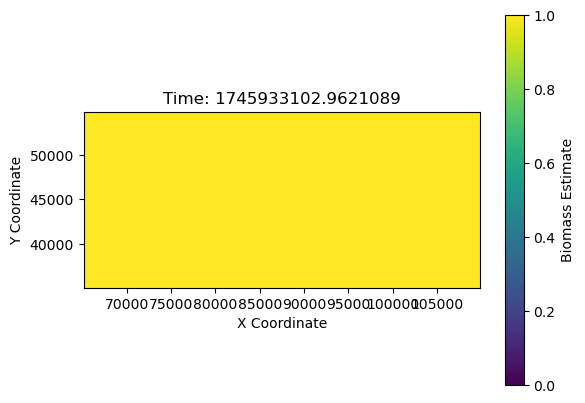

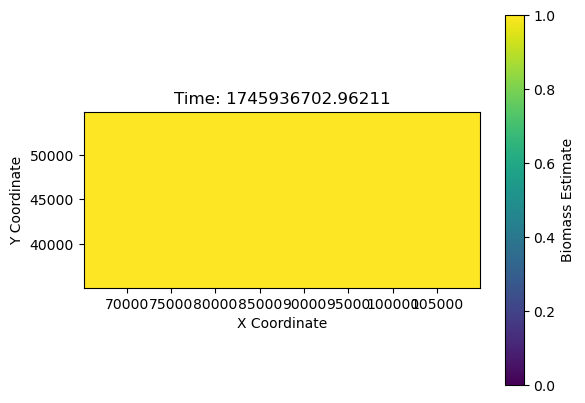

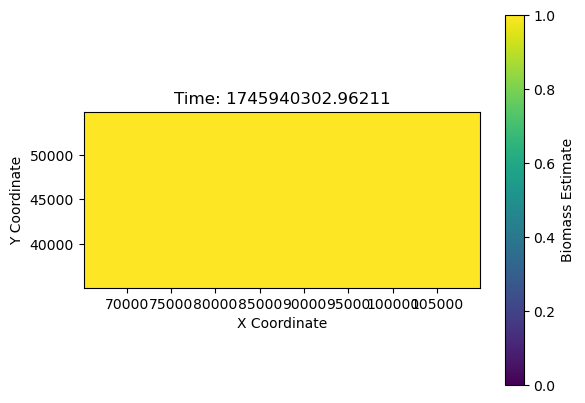

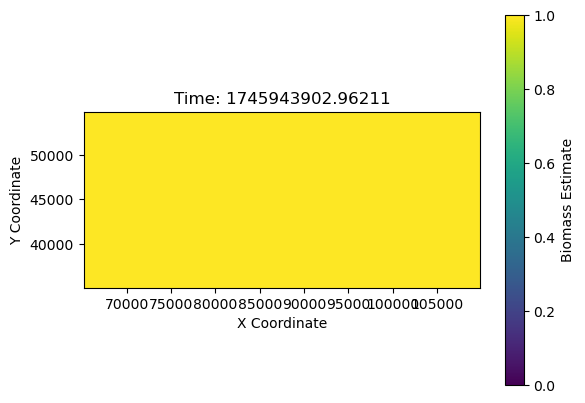

In [16]:
for t in range(len(time_ax)):
    uncertainty_estimate_t = nc_file.variables['uncertainty_biomass'][t, :, :]
    plt.imshow(uncertainty_estimate_t, cmap='viridis', interpolation='nearest', origin='lower', extent=(xc.min(), xc.max(), yc.min(), yc.max()))    
    plt.colorbar(label='Biomass Estimate')
    plt.title(f'Time: {time_ax[t]}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()